In [1]:
# Eliriana Lleshi 
# HW3 Part 1

##### Part 1A 

import pandas as pd
import io
import requests
import urllib3
urllib3.disable_warnings()
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
s = requests.get(url, verify=False).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')), delimiter = ';')

In [2]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# red_wines_array stores attributes 
import numpy as np
quality = df['quality'].values
red_wines_array = df.drop(columns = ['quality']).values

In [4]:
# target array stores the target "quality" with binary values
target = np.zeros((len(quality),1))
target[quality >=7] = 1
target

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [5]:
##### PART 1B

from sklearn.model_selection import cross_val_score
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)


In [19]:
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(2, 11)
knn_df=pd.DataFrame()
df_scores=pd.DataFrame()

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # get cross_val_score for loop value of k neighbours
    scores = cross_val_score(knn, red_wines_array, target.ravel(), cv=10, scoring='f1')
    # convert list of scores returned from cross_val_score + column k to a dataframe
    df_scores = pd.DataFrame({"f1":scores,"k":k})
    # append df_scores dataframes returned for each k
    knn_df = pd.concat([df_scores, knn_df])

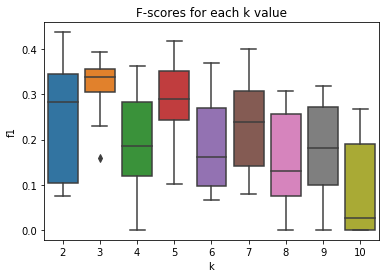

In [20]:
import seaborn as sns
ax = sns.boxplot(  x="k" , y = "f1" , data= knn_df)
ax.set_title("F-scores for each k value");

In [8]:
##### PART 1C

from sklearn import metrics
from sklearn.model_selection import train_test_split
wines_features_train, wines_features_test, wines_labels_train, wines_labels_test = train_test_split(red_wines_array, target.ravel(), test_size=0.33, random_state=42)

In [9]:
from sklearn import tree #For our Decision Tree
from sklearn.tree import DecisionTreeClassifier
from graphviz import Digraph
from sklearn import metrics

dtree8 = DecisionTreeClassifier(max_depth = 8)
dtree6 = DecisionTreeClassifier(max_depth = 6)
dtree4 = DecisionTreeClassifier(max_depth = 4)
dtree2 = DecisionTreeClassifier(max_depth = 2)

dtree8.fit(wines_features_train,wines_labels_train)
dtree6.fit(wines_features_train,wines_labels_train)
dtree4.fit(wines_features_train,wines_labels_train)
dtree2.fit(wines_features_train,wines_labels_train)

predictions_test8 = dtree8.predict(wines_features_test)
predictions_test6 = dtree6.predict(wines_features_test)
predictions_test4 = dtree4.predict(wines_features_test)
predictions_test2 = dtree4.predict(wines_features_test)

In [10]:
cm8 = metrics.confusion_matrix(wines_labels_test,predictions_test8)
cm6 = metrics.confusion_matrix(wines_labels_test,predictions_test6)
cm4 = metrics.confusion_matrix(wines_labels_test,predictions_test4)
cm2 = metrics.confusion_matrix(wines_labels_test,predictions_test2)

In [11]:
P =  metrics.precision_score(wines_labels_test,predictions_test8)
R = metrics.accuracy_score(wines_labels_test,predictions_test8)
F1 = 2*P*R/(P+R)

print("Precision(depth 8): ", P)
print("Recall(depth 8): ", R)
print("Accuracy(depth 8): ", metrics.accuracy_score(wines_labels_test,predictions_test8))
print("F1 score(depth 8)"": ", F1)

Precision(depth 8):  0.5131578947368421
Recall(depth 8):  0.8579545454545454
Accuracy(depth 8):  0.8579545454545454
F1 score(depth 8):  0.6422028353326064


In [12]:
P =  metrics.precision_score(wines_labels_test,predictions_test6)
R = metrics.accuracy_score(wines_labels_test,predictions_test6)
F1 = 2*P*R/(P+R)

print("Precision(depth 6): ", P)
print("Recall(depth 6): ", R)
print("Accuracy(depth 6): ", metrics.accuracy_score(wines_labels_test,predictions_test6))
print("F1 score(depth 6)"": ", F1)

Precision(depth 6):  0.5178571428571429
Recall(depth 6):  0.8579545454545454
Accuracy(depth 6):  0.8579545454545454
F1 score(depth 6):  0.6458702064896756


In [13]:
P =  metrics.precision_score(wines_labels_test,predictions_test4)
R = metrics.accuracy_score(wines_labels_test,predictions_test4)
F1 = 2*P*R/(P+R)

print("Precision(depth 4): ", P)
print("Recall(depth 4): ", R)
print("Accuracy(depth 4): ", metrics.accuracy_score(wines_labels_test,predictions_test4))
print("F1 score(depth 4)"": ", F1)

Precision(depth 4):  0.5370370370370371
Recall(depth 4):  0.8617424242424242
Accuracy(depth 4):  0.8617424242424242
F1 score(depth 4):  0.6617020209618375


In [14]:
P =  metrics.precision_score(wines_labels_test,predictions_test2)
R = metrics.accuracy_score(wines_labels_test,predictions_test2)
F1 = 2*P*R/(P+R)

print("Precision(depth 2): ", P)
print("Recall(depth 2): ", R)
print("Accuracy(depth 2): ", metrics.accuracy_score(wines_labels_test,predictions_test2))
print("F1 score(depth 2)"": ", F1)

Precision(depth 2):  0.5370370370370371
Recall(depth 2):  0.8617424242424242
Accuracy(depth 2):  0.8617424242424242
F1 score(depth 2):  0.6617020209618375


In [15]:
dtree8_prob = dtree8.predict_proba(wines_features_test)
dtree6_prob = dtree6.predict_proba(wines_features_test)
dtree4_prob = dtree4.predict_proba(wines_features_test)
dtree2_prob = dtree2.predict_proba(wines_features_test)

In [16]:
fpr8, tpr8, thresholds8 = metrics.roc_curve(wines_labels_test, dtree8_prob[:,1], pos_label=1, sample_weight=None)
fpr6, tpr6, thresholds6 = metrics.roc_curve(wines_labels_test, dtree6_prob[:,1], pos_label=1, sample_weight=None)
fpr4, tpr4, thresholds4 = metrics.roc_curve(wines_labels_test, dtree4_prob[:,1], pos_label=1, sample_weight=None)
fpr2, tpr2, thresholds2 = metrics.roc_curve(wines_labels_test, dtree2_prob[:,1], pos_label=1, sample_weight=None)

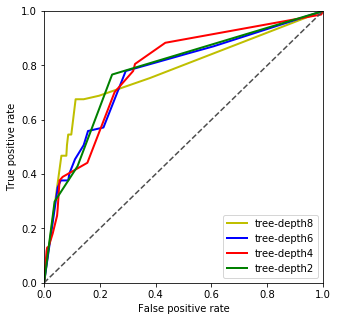

In [17]:
# plot TPR vs FPR for each decision trees, along with x=y line 

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize=(5,5))
plt.plot(fpr8,tpr8,linewidth=2.0, color='y', label = "tree-depth8")
plt.plot(fpr6,tpr6,linewidth=2.0, color='b', label = "tree-depth6")
plt.plot(fpr4,tpr4,linewidth=2.0, color='r', label = "tree-depth4")
plt.plot(fpr2,tpr2,linewidth=2.0, color='g', label = "tree-depth2")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])
ident = [0.0, 1.0]
plt.plot(ident,ident, ls="--", c=".3")
plt.legend();

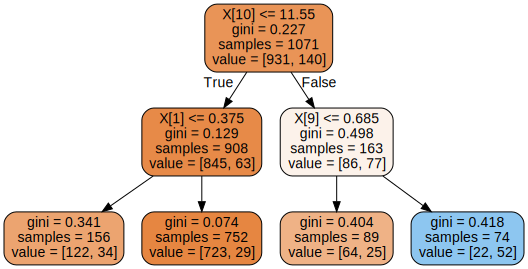

In [18]:
# Decision tree of depth 2 
    # From the curves, high depth performs slightly better for small FPR 
    # and small depth models performs slightly better for large FPR
    # depth-2 has a better accuracy and F1 score than depth-8

import os
import graphviz 
from sklearn.tree import export_graphviz

dot_data = tree.export_graphviz(dtree2,
            filled = True,
            rounded = True)

graph = graphviz.Source(dot_data) 

# display decision tree with splits 
graph